<a href="https://colab.research.google.com/github/MdShahadatHossainbd/Plant-Disease-Detection/blob/main/How_To_Train_Deep_Learning_InceptionV3_Models_In_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow-gpu

     |████████████████████████████████| 320.4MB 47kB/s 


In [3]:
!nvidia-smi

Sat Oct 10 04:57:17 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
import tensorflow as tf
tf.__version__

'2.3.1'

In [6]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [8]:


# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/Programs/Datasets/New Plant Diseases Dataset(Augmented)/train'
valid_path = '/content/drive/My Drive/Programs/Datasets/New Plant Diseases Dataset(Augmented)/valid'



In [9]:
# Import the InceptionV3 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [10]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [18]:
# useful for getting number of output classes
folders = glob('/content/drive/My Drive/Programs/Datasets/New Plant Diseases Dataset(Augmented)/train/*')
folders

['/content/drive/My Drive/Programs/Datasets/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot',
 '/content/drive/My Drive/Programs/Datasets/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 '/content/drive/My Drive/Programs/Datasets/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold',
 '/content/drive/My Drive/Programs/Datasets/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/My Drive/Programs/Datasets/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot',
 '/content/drive/My Drive/Programs/Datasets/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy',
 '/content/drive/My Drive/Programs/Datasets/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight',
 '/content/drive/My Drive/Programs/Datasets/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/My Drive/Programs/Datasets/New Plant Diseases Da

In [19]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [20]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [21]:
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [22]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [23]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [29]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Programs/Datasets/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [30]:


test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Programs/Datasets/New Plant Diseases Dataset(Augmented)/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')



Found 2047 images belonging to 10 classes.


In [31]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=3,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/3
574/574 [==============================] - 11198s 20s/step - loss: 2.4734 - accuracy: 0.6968 - val_loss: 2.3444 - val_accuracy: 0.7416
Epoch 2/3
574/574 [==============================] - 229s 399ms/step - loss: 2.0067 - accuracy: 0.7935 - val_loss: 2.5439 - val_accuracy: 0.7699
Epoch 3/3
574/574 [==============================] - 228s 397ms/step - loss: 2.1158 - accuracy: 0.8177 - val_loss: 2.6231 - val_accuracy: 0.8168


In [32]:
import matplotlib.pyplot as plt

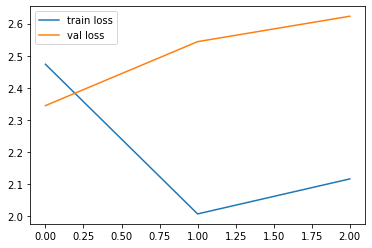

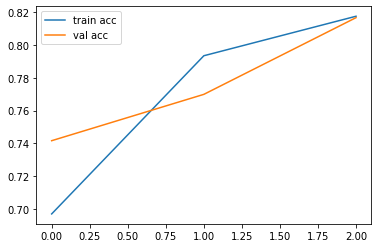

<Figure size 432x288 with 0 Axes>

In [33]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [34]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [35]:
y_pred = model.predict(test_set)
y_pred

array([[1.4255922e-12, 1.6896186e-06, 3.3485999e-11, ..., 4.3325603e-29,
        6.6760390e-20, 2.3527523e-14],
       [5.1616047e-36, 5.0371623e-25, 1.3627133e-32, ..., 4.2225238e-31,
        1.0000000e+00, 0.0000000e+00],
       [8.0667007e-32, 3.0523627e-25, 3.3521981e-25, ..., 1.0000000e+00,
        8.3113483e-16, 4.1667163e-14],
       ...,
       [0.0000000e+00, 2.5900948e-07, 1.6506499e-11, ..., 3.4037903e-26,
        9.9999976e-01, 0.0000000e+00],
       [9.9056832e-02, 8.1309722e-14, 1.5901359e-26, ..., 2.6211593e-27,
        2.3370803e-32, 0.0000000e+00],
       [1.7732964e-16, 1.7498992e-11, 2.1583460e-06, ..., 2.4904628e-27,
        8.6431020e-05, 3.9822175e-30]], dtype=float32)

In [36]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [37]:
y_pred

array([6, 8, 7, ..., 8, 4, 4])

In [59]:
img=image.load_img('/content/drive/My Drive/Programs/Datasets/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG',target_size=(224,224))

In [60]:
x=image.img_to_array(img)
x

array([[[149., 143., 143.],
        [151., 145., 145.],
        [153., 147., 147.],
        ...,
        [159., 153., 155.],
        [157., 151., 153.],
        [156., 150., 152.]],

       [[152., 146., 146.],
        [152., 146., 146.],
        [154., 148., 148.],
        ...,
        [158., 152., 154.],
        [158., 152., 154.],
        [158., 152., 154.]],

       [[154., 148., 148.],
        [154., 148., 148.],
        [154., 148., 148.],
        ...,
        [157., 151., 153.],
        [158., 152., 154.],
        [158., 152., 154.]],

       ...,

       [[120., 110., 111.],
        [117., 107., 108.],
        [116., 106., 107.],
        ...,
        [115., 109., 111.],
        [113., 107., 109.],
        [120., 114., 116.]],

       [[121., 111., 112.],
        [118., 108., 109.],
        [117., 107., 108.],
        ...,
        [119., 113., 115.],
        [119., 113., 115.],
        [119., 113., 115.]],

       [[121., 111., 112.],
        [117., 107., 108.],
        [117., 1

In [61]:
x.shape

(224, 224, 3)

In [62]:
x=x/255

In [63]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [64]:
model.predict(img_data)

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [69]:
a=np.argmax(model.predict(img_data), axis=1)

In [70]:
a==1

array([False])